# Проект "Определение перспективного тарифа для телеком-компании"

## Цели и задачи

Целью проекта является определение тарифного плана компании "Алло, привет", который приносит наибольшую выручку. <br>
Для выполнения поставленной цели, необходимо решить следующие задачи:
1. Изучить общие свойства нескольких датасетов.
2. Проверить их на наличие ошибок, пропусков, дубликатов, выбросов и так далее.
3. Проанализировать датасеты.
4. С помощью статистического анализа определить наиболее выгодный для компании тарифный план.
5. Сделать итоговый вывод.

## Общая информация по датасетам

In [134]:
import pandas as pd
from scipy import stats as st # импорт библиотек
from math import ceil
import numpy as np

### Звонки

In [136]:
calls.info() #получение информации

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


### Интернет

In [137]:
internet.info() #получение информации

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


### Сообщения

In [138]:
messages.info() #получение информации

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


### Тарифы

In [139]:
tariffs.info() #получение информации

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


### Пользователи

In [140]:
users.info() #получение информации

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


# Вывод

Была получена общая информация по каждому датасету. Почти в каждом датасете отсутствуют пропущенные значения.

## Подготовка данных 

### Звонки

#### Поиск ошибок и преобразование типов данных 

In [141]:
calls.head(5) #вывод первых 5 строк

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Надо перевести столбец call_date в временной формат.

In [142]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d') #переводим столбец в формат времени

In [143]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


<AxesSubplot:>

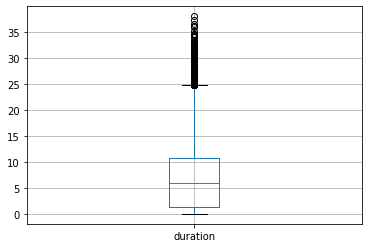

In [144]:
calls.boxplot('duration')

In [145]:
calls['duration'].describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

In [146]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

In [147]:
calls

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12
...,...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499,12
202603,1499_216,2018-10-18,18.83,1499,10
202604,1499_217,2018-11-10,10.81,1499,11
202605,1499_218,2018-10-06,4.27,1499,10


#### Количество звонков и количество минут разговора по месяцам для каждого пользователя

In [148]:
def rounding(a):
    if a>0:
        return np.ceil(a)
    else:
        return 0

In [149]:
calls['duration'] = calls['duration'].apply(rounding)

In [150]:
calls.head(5)

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12


In [151]:
calls_piv_1 = calls.pivot_table(index='user_id', columns='month', values='duration', aggfunc='count')
calls_piv_2 = calls.pivot_table(index='user_id', columns='month', values='duration', aggfunc='sum') #получаем сводную таблицу по каждому пользователю и месяцу

In [152]:
calls_piv_1

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,22.0,43.0,47.0,52.0,58.0,57.0,43.0,46.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,63.0
1002,NaN,NaN,NaN,NaN,NaN,15.0,26.0,42.0,36.0,33.0,32.0,33.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,134.0,108.0,115.0,108.0
1004,NaN,NaN,NaN,NaN,9.0,31.0,22.0,19.0,26.0,29.0,19.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,112.0,152.0,129.0,155.0
1496,7.0,77.0,79.0,67.0,63.0,74.0,73.0,88.0,68.0,72.0,80.0,80.0
1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,64.0,71.0


In [153]:
calls_piv_2

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,159.0,172.0,340.0,408.0,466.0,350.0,338.0,333.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,430.0,414.0
1002,NaN,NaN,NaN,NaN,NaN,117.0,214.0,289.0,206.0,212.0,243.0,236.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380.0,961.0,855.0,824.0,802.0
1004,NaN,NaN,NaN,NaN,35.0,171.0,135.0,137.0,117.0,145.0,117.0,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.0,813.0,1030.0,954.0,1031.0
1496,48.0,594.0,557.0,521.0,484.0,555.0,582.0,527.0,486.0,450.0,662.0,518.0
1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,490.0,371.0,545.0


In [154]:
calls_piv_1.columns = [f"count_calls_month_{i}" for i in range(1,13)] #изменяем названия столбцов
calls_piv_2.columns = [f"sum_calls_month_{i}" for i in range(1,13)]

In [155]:
users = users.join(calls_piv_1, on='user_id')
users = users.join(calls_piv_2, on='user_id')

In [156]:
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,count_calls_month_1,count_calls_month_2,...,sum_calls_month_3,sum_calls_month_4,sum_calls_month_5,sum_calls_month_6,sum_calls_month_7,sum_calls_month_8,sum_calls_month_9,sum_calls_month_10,sum_calls_month_11,sum_calls_month_12
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,NaN,NaN,...,NaN,NaN,159.0,172.0,340.0,408.0,466.0,350.0,338.0,333.0
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,430.0,414.0
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,NaN,NaN,...,NaN,NaN,NaN,117.0,214.0,289.0,206.0,212.0,243.0,236.0
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,380.0,961.0,855.0,824.0,802.0
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,NaN,NaN,...,NaN,NaN,35.0,171.0,135.0,137.0,117.0,145.0,117.0,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,92.0,813.0,1030.0,954.0,1031.0
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart,7.0,77.0,...,557.0,521.0,484.0,555.0,582.0,527.0,486.0,450.0,662.0,518.0
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,490.0,371.0,545.0
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,NaN,NaN,...,NaN,NaN,NaN,NaN,175.0,400.0,471.0,247.0,NaN,NaN


### Интернет

#### Поиск ошибок и преобразование типов данных

In [157]:
internet.head(5)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [158]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d') #переводим столбец в формат времени

In [159]:
internet.rename(columns={'mb_used': 'gb_used'}, inplace=True)

In [160]:
internet.head(5)

,Unnamed: 0,id,gb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [161]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   gb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


<AxesSubplot:>

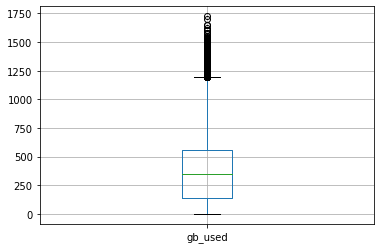

In [162]:
internet.boxplot('gb_used')

In [163]:
internet['gb_used'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: gb_used, dtype: float64

In [164]:
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

In [165]:
internet.head()

,Unnamed: 0,id,gb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,9
2,2,1000_2,1197.26,2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9


#### Объем затраченного интеренета по месяцам для каждого пользователя

In [166]:
internet_piv = internet.pivot_table(index='user_id', columns='month', values='gb_used', aggfunc='sum')  #получаем сводную таблицу по каждому пользователю и месяцу

In [167]:
internet_piv.columns = [f"gb_used_month_{i}" for i in range(1,13)] #изменяем названия столбцов

In [168]:
users = users.join(internet_piv, on='user_id')

In [169]:
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,count_calls_month_1,count_calls_month_2,...,gb_used_month_3,gb_used_month_4,gb_used_month_5,gb_used_month_6,gb_used_month_7,gb_used_month_8,gb_used_month_9,gb_used_month_10,gb_used_month_11,gb_used_month_12
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,NaN,NaN,...,NaN,NaN,2253.49,23233.77,14003.64,14055.93,14568.91,14702.49,14756.47,9817.61
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18429.34,14036.66
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,NaN,NaN,...,NaN,NaN,NaN,10856.82,17580.10,20319.26,16691.08,13888.25,18587.28,18113.73
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8565.21,12468.87,14768.14,11356.89,10121.53
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,NaN,NaN,...,NaN,NaN,13403.98,17600.02,22229.58,28584.37,15109.03,18475.44,15616.02,18021.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2614.07,33067.62,29363.00,38939.11,23426.76
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart,7.0,77.0,...,24959.0,21074.67,23709.75,20134.31,24364.76,23530.03,26934.65,28183.17,25063.40,20736.15
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11500.29,14156.08,19918.60
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,NaN,NaN,...,NaN,NaN,NaN,NaN,7476.24,24235.21,22134.41,20579.36,NaN,NaN


### Сообщения

#### Поиск ошибок и преобразование типов данных

In [170]:
messages.head(5)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [171]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d') #переводим столбец в формат времени

In [172]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [173]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

In [174]:
messages.head(5)

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


#### Количество сообщений по месяцам для каждого пользователя

In [175]:
messages_piv = messages.pivot_table(index='user_id', columns='month', values='message_date', aggfunc='count') #получаем сводную таблицу по каждому пользователю и месяцу

In [176]:
messages_piv.head(5)

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,22.0,60.0,75.0,81.0,57.0,73.0,58.0,70.0
1002,NaN,NaN,NaN,NaN,NaN,4.0,11.0,13.0,4.0,10.0,16.0,12.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,91.0,83.0,94.0,75.0
1004,NaN,NaN,NaN,NaN,95.0,134.0,181.0,151.0,146.0,165.0,158.0,162.0
1005,7.0,38.0,56.0,41.0,42.0,47.0,56.0,64.0,52.0,44.0,51.0,54.0


In [177]:
messages_piv.columns = [f"count_messages_month_{i}" for i in range(1,13)] #изменяем названия столбцов

In [178]:
users = users.join(messages_piv, on='user_id')

In [179]:
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,count_calls_month_1,count_calls_month_2,...,count_messages_month_3,count_messages_month_4,count_messages_month_5,count_messages_month_6,count_messages_month_7,count_messages_month_8,count_messages_month_9,count_messages_month_10,count_messages_month_11,count_messages_month_12
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,NaN,NaN,...,NaN,NaN,22.0,60.0,75.0,81.0,57.0,73.0,58.0,70.0
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,NaN,NaN,...,NaN,NaN,NaN,4.0,11.0,13.0,4.0,10.0,16.0,12.0
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,37.0,91.0,83.0,94.0,75.0
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,NaN,NaN,...,NaN,NaN,95.0,134.0,181.0,151.0,146.0,165.0,158.0,162.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,13.0,82.0,82.0,79.0,84.0
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart,7.0,77.0,...,46.0,49.0,40.0,35.0,42.0,41.0,29.0,35.0,46.0,51.0
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,14.0,17.0
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,NaN,NaN,...,NaN,NaN,NaN,NaN,20.0,62.0,44.0,42.0,NaN,NaN


### Тарифы

In [180]:
tariffs.head(5)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [181]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [182]:
tariffs['mb_per_month_included'] = tariffs['mb_per_month_included']/1024
tariffs.rename(columns={'mb_per_month_included': 'gb_per_month_included'}, inplace=True)

In [183]:
tariffs

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15.0,500,550,200,3,3,smart
1,1000,30.0,3000,1950,150,1,1,ultra


### Пользователи

In [184]:
users.head(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,count_calls_month_1,count_calls_month_2,...,count_messages_month_3,count_messages_month_4,count_messages_month_5,count_messages_month_6,count_messages_month_7,count_messages_month_8,count_messages_month_9,count_messages_month_10,count_messages_month_11,count_messages_month_12
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,NaN,NaN,...,NaN,NaN,22.0,60.0,75.0,81.0,57.0,73.0,58.0,70.0
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,NaN,NaN,...,NaN,NaN,NaN,4.0,11.0,13.0,4.0,10.0,16.0,12.0
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,37.0,91.0,83.0,94.0,75.0
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,NaN,NaN,...,NaN,NaN,95.0,134.0,181.0,151.0,146.0,165.0,158.0,162.0


In [185]:
for i in range(1,13):
    users[f'gb_used_month_{i}'] = users[f'gb_used_month_{i}']/1024

In [186]:
for i in range(1,13):
    users[f'gb_used_month_{i}'] = users[f'gb_used_month_{i}'].apply(rounding)

In [187]:
users['churn_date'] = users['churn_date'].fillna('2018-12-31') #лучше так заменить, чтобы отслеживать сколько месяцев пользователь использует тариф

In [188]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d') #переводим столбец в формат времени

In [189]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d') #переводим столбец в формат времени

In [190]:
users['reg_month'] = pd.DatetimeIndex(users['reg_date']).month
users['churn_month'] = pd.DatetimeIndex(users['churn_date']).month

In [191]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 58 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   user_id                  500 non-null    int64         
 1   age                      500 non-null    int64         
 2   churn_date               500 non-null    datetime64[ns]
 3   city                     500 non-null    object        
 4   first_name               500 non-null    object        
 5   last_name                500 non-null    object        
 6   reg_date                 500 non-null    datetime64[ns]
 7   tariff                   500 non-null    object        
 8   count_calls_month_1      43 non-null     float64       
 9   count_calls_month_2      82 non-null     float64       
 10  count_calls_month_3      114 non-null    float64       
 11  count_calls_month_4      165 non-null    float64       
 12  count_calls_month_5      205 non-nul

In [192]:
users['city'].sort_values().unique() #нет неявных дубликатов

array(['Архангельск', 'Астрахань', 'Балашиха', 'Барнаул', 'Белгород',
       'Брянск', 'Владивосток', 'Владикавказ', 'Владимир', 'Волгоград',
       'Волжский', 'Вологда', 'Воронеж', 'Грозный', 'Екатеринбург',
       'Иваново', 'Ижевск', 'Иркутск', 'Казань', 'Калининград', 'Калуга',
       'Кемерово', 'Киров', 'Кострома', 'Краснодар', 'Красноярск',
       'Курган', 'Курск', 'Липецк', 'Магнитогорск', 'Махачкала', 'Москва',
       'Мурманск', 'Набережные Челны', 'Нижневартовск', 'Нижний Новгород',
       'Нижний Тагил', 'Новокузнецк', 'Новороссийск', 'Новосибирск',
       'Омск', 'Оренбург', 'Орёл', 'Пенза', 'Пермь', 'Петрозаводск',
       'Подольск', 'Ростов-на-Дону', 'Рязань', 'Самара',
       'Санкт-Петербург', 'Саранск', 'Саратов', 'Севастополь', 'Смоленск',
       'Сочи', 'Ставрополь', 'Стерлитамак', 'Сургут', 'Тамбов', 'Тверь',
       'Тольятти', 'Томск', 'Тула', 'Тюмень', 'Улан-Удэ', 'Ульяновск',
       'Уфа', 'Хабаровск', 'Химки', 'Чебоксары', 'Челябинск', 'Череповец',
       'Чи

In [193]:
users['tariff'].value_counts() # нет ошибок в столбце. Есть два тарифа

smart    351
ultra    149
Name: tariff, dtype: int64

In [194]:
check_users = pd.DataFrame(data = list(zip(users['age'], users['first_name'], users['last_name'])), columns = ['age', 'first_name', 'last_name'])

In [195]:
check_users #проверка дубликатов на пользователей с учетом фамилии, имени и возраста

,age,first_name,last_name
0,52,Рафаил,Верещагин
1,41,Иван,Ежов
2,59,Евгений,Абрамович
3,23,Белла,Белякова
4,68,Татьяна,Авдеенко
...,...,...,...
495,65,Авксентий,Фокин
496,36,Трифон,Блохин
497,32,Каролина,Агеева
498,68,Всеволод,Акимчин


In [196]:
check_users = check_users.drop_duplicates()

In [197]:
check_users

,age,first_name,last_name
0,52,Рафаил,Верещагин
1,41,Иван,Ежов
2,59,Евгений,Абрамович
3,23,Белла,Белякова
4,68,Татьяна,Авдеенко
...,...,...,...
495,65,Авксентий,Фокин
496,36,Трифон,Блохин
497,32,Каролина,Агеева
498,68,Всеволод,Акимчин


In [198]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 58 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   user_id                  500 non-null    int64         
 1   age                      500 non-null    int64         
 2   churn_date               500 non-null    datetime64[ns]
 3   city                     500 non-null    object        
 4   first_name               500 non-null    object        
 5   last_name                500 non-null    object        
 6   reg_date                 500 non-null    datetime64[ns]
 7   tariff                   500 non-null    object        
 8   count_calls_month_1      43 non-null     float64       
 9   count_calls_month_2      82 non-null     float64       
 10  count_calls_month_3      114 non-null    float64       
 11  count_calls_month_4      165 non-null    float64       
 12  count_calls_month_5      205 non-nul

In [199]:
tariffs.head(5)

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15.0,500,550,200,3,3,smart
1,1000,30.0,3000,1950,150,1,1,ultra


Дубликатов нет

In [200]:
def revenue(tariff, message, gb, minute): #функция по подсчету задолжности с округлением минут и гб в большую сторону
    if tariff == 'smart':
        sun = 0
        mess = 50-message
        if mess<0:
            sun += (-3*mess)
        gb_u = 15.0-gb
        if gb_u<0:
            sun += (-200*(ceil(gb_u)))
        minu = 500-minute
        if minu<0:
            sun += (-3*(ceil(minu)))
    else:
        sun = 0
        mess = 1000-message
        if mess<0:
            sun += (-1*mess)
        gb_u = 30.0-gb
        if gb_u<0:
            sun += (-150*(ceil(gb_u)))
        minu = 3000-minute
        if minu<0:
            sun += (-1*(ceil(minu)))
    return sun

In [202]:
for i in range(1,13):
    users[f'revenue_month_{i}'] = users.apply(lambda row: revenue(row['tariff'], row[f"count_messages_month_{i}"],row[f"gb_used_month_{i}"],row[f"sum_calls_month_{i}"]), axis=1)

In [203]:
users.head(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,count_calls_month_1,count_calls_month_2,...,revenue_month_3,revenue_month_4,revenue_month_5,revenue_month_6,revenue_month_7,revenue_month_8,revenue_month_9,revenue_month_10,revenue_month_11,revenue_month_12
0,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1001,41,2018-12-31,Москва,Иван,Ежов,2018-11-01,smart,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,600.0,0.0
2,1002,59,2018-12-31,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,NaN,NaN,...,0.0,0.0,0.0,0.0,600.0,1000.0,400.0,0.0,800.0,600.0
3,1003,23,2018-12-31,Москва,Белла,Белякова,2018-08-17,ultra,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1004,68,2018-12-31,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [204]:
def online(reg, churn, tariff, reven, i): #учет месяца регистрации и месяца отказа при начислении стоимости за пользвание тарифа
    if i >=reg and i <= churn:
        if tariff == 'smart':
            reven += 550
        else:
            reven += 1950
    else:
        reven += 0
    return reven

In [205]:
for i in range(1,13): #выполнение функции по окончательносу начислению стоиомсти
    users[f'revenue_month_{i}'] = users.apply(lambda row: online(row['reg_month'], row['churn_month'], row['tariff'], row[f'revenue_month_{i}'], i), axis=1)

In [206]:
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,count_calls_month_1,count_calls_month_2,...,revenue_month_3,revenue_month_4,revenue_month_5,revenue_month_6,revenue_month_7,revenue_month_8,revenue_month_9,revenue_month_10,revenue_month_11,revenue_month_12
0,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,NaN,NaN,...,0.0,0.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
1,1001,41,2018-12-31,Москва,Иван,Ежов,2018-11-01,smart,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1150.0,550.0
2,1002,59,2018-12-31,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,NaN,NaN,...,0.0,0.0,0.0,550.0,1150.0,1550.0,950.0,550.0,1350.0,1150.0
3,1003,23,2018-12-31,Москва,Белла,Белякова,2018-08-17,ultra,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1950.0,1950.0,1950.0,1950.0,1950.0
4,1004,68,2018-12-31,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,NaN,NaN,...,0.0,0.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
5,1005,67,2018-12-31,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,15.0,69.0,...,886.0,1186.0,835.0,886.0,775.0,949.0,556.0,1219.0,694.0,838.0
6,1006,21,2018-12-31,Ульяновск,Леонид,Ермолаев,2018-02-26,smart,NaN,3.0,...,950.0,550.0,550.0,550.0,1550.0,1350.0,750.0,1550.0,550.0,1350.0
7,1007,65,2018-12-31,Москва,Юна,Березина,2018-04-19,smart,NaN,NaN,...,0.0,550.0,1150.0,685.0,981.0,1750.0,1015.0,550.0,990.0,550.0
8,1008,63,2018-12-31,Челябинск,Рустэм,Пономарёв,2018-12-19,smart,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,568.0
9,1009,24,2018-12-31,Пермь,Василиса,Блинова,2018-03-22,smart,NaN,NaN,...,550.0,550.0,550.0,750.0,2550.0,2350.0,1950.0,1550.0,950.0,1350.0


## Анализ данных

### Тариф smart

In [207]:
smart_calls = users.query("tariff == 'smart'").iloc[:,20:32]
ultra_calls = users.query("tariff == 'ultra'").iloc[:,20:32]
smart_gb = users.query("tariff == 'smart'").iloc[:,32:44]
ultra_gb = users.query("tariff == 'ultra'").iloc[:,32:44]
smart_mess = users.query("tariff == 'smart'").iloc[:,44:56]
ultra_mess = users.query("tariff == 'ultra'").iloc[:,44:56]

In [208]:
len(smart_gb), len(ultra_calls)

(351, 149)

In [209]:
print('Среднее:', smart_calls.mean())
print('Дисперсия:', smart_calls.var(ddof=1))
print('Стандартное отклонение:', smart_calls.std(ddof=1))

Среднее: sum_calls_month_1     203.852941
sum_calls_month_2     298.689655
sum_calls_month_3     390.051948
sum_calls_month_4     367.133929
sum_calls_month_5     387.361702
sum_calls_month_6     398.067485
sum_calls_month_7     408.353234
sum_calls_month_8     423.269231
sum_calls_month_9     430.266409
sum_calls_month_10    427.590444
sum_calls_month_11    436.647619
sum_calls_month_12    479.985119
dtype: float64
Дисперсия: sum_calls_month_1     23787.341355
sum_calls_month_2     36412.287961
sum_calls_month_3     36823.155161
sum_calls_month_4     34778.207127
sum_calls_month_5     34820.061094
sum_calls_month_6     29960.520109
sum_calls_month_7     32250.269602
sum_calls_month_8     34177.270551
sum_calls_month_9     32950.529526
sum_calls_month_10    34889.530319
sum_calls_month_11    31100.611101
sum_calls_month_12    39131.447539
dtype: float64
Стандартное отклонение: sum_calls_month_1     154.231454
sum_calls_month_2     190.820041
sum_calls_month_3     191.893604
sum_calls_m

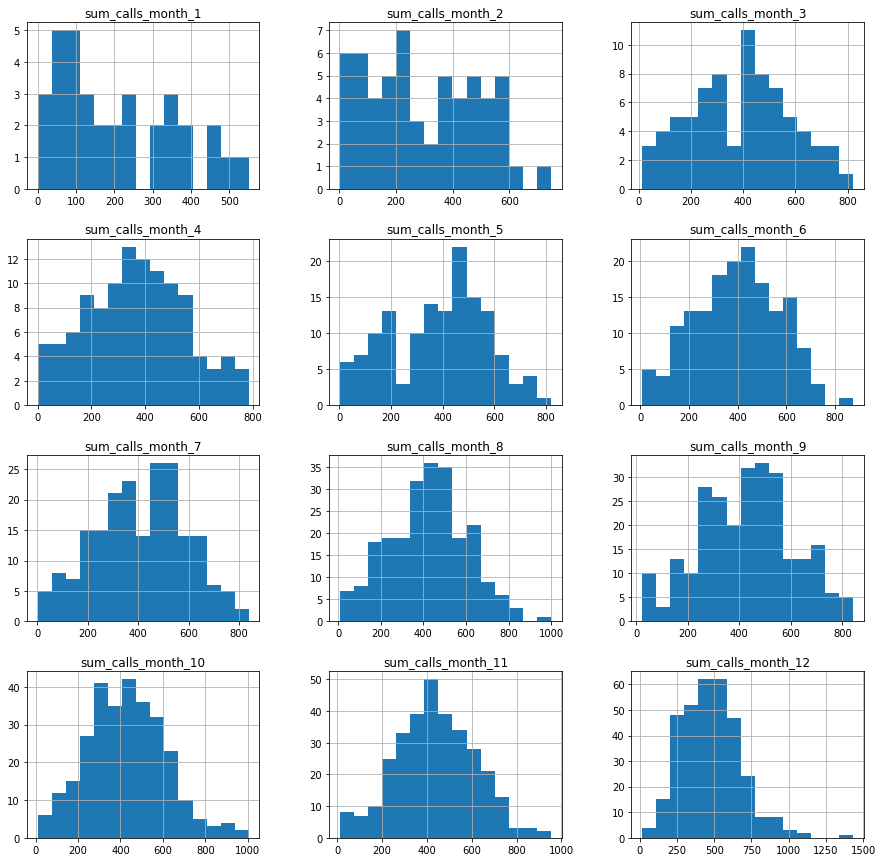

In [210]:
smart_calls.hist(bins=15, figsize=(15,15));

Количество минут разговора в первом месяце близко к распределению Пуассона. В остальные месяцы распределение близко к нормальному.

In [211]:
print('Среднее:', smart_gb.mean())
print('Дисперсия:', smart_gb.var(ddof=1))
print('Стандартное отклонение:', smart_gb.std(ddof=1))

Среднее: gb_used_month_1      0.846154
gb_used_month_2      1.957265
gb_used_month_3      3.341880
gb_used_month_4      4.347578
gb_used_month_5      6.390313
gb_used_month_6      7.452991
gb_used_month_7      9.091168
gb_used_month_8     11.205128
gb_used_month_9     12.142450
gb_used_month_10    14.139601
gb_used_month_11    15.304843
gb_used_month_12    17.475783
dtype: float64
Дисперсия: gb_used_month_1     10.410549
gb_used_month_2     25.458168
gb_used_month_3     46.922784
gb_used_month_4     50.375987
gb_used_month_5     74.741506
gb_used_month_6     78.379927
gb_used_month_7     80.951665
gb_used_month_8     82.237802
gb_used_month_9     70.905364
gb_used_month_10    66.411884
gb_used_month_11    50.481091
gb_used_month_12    41.318698
dtype: float64
Стандартное отклонение: gb_used_month_1     3.226538
gb_used_month_2     5.045609
gb_used_month_3     6.850021
gb_used_month_4     7.097604
gb_used_month_5     8.645317
gb_used_month_6     8.853244
gb_used_month_7     8.997314
gb_

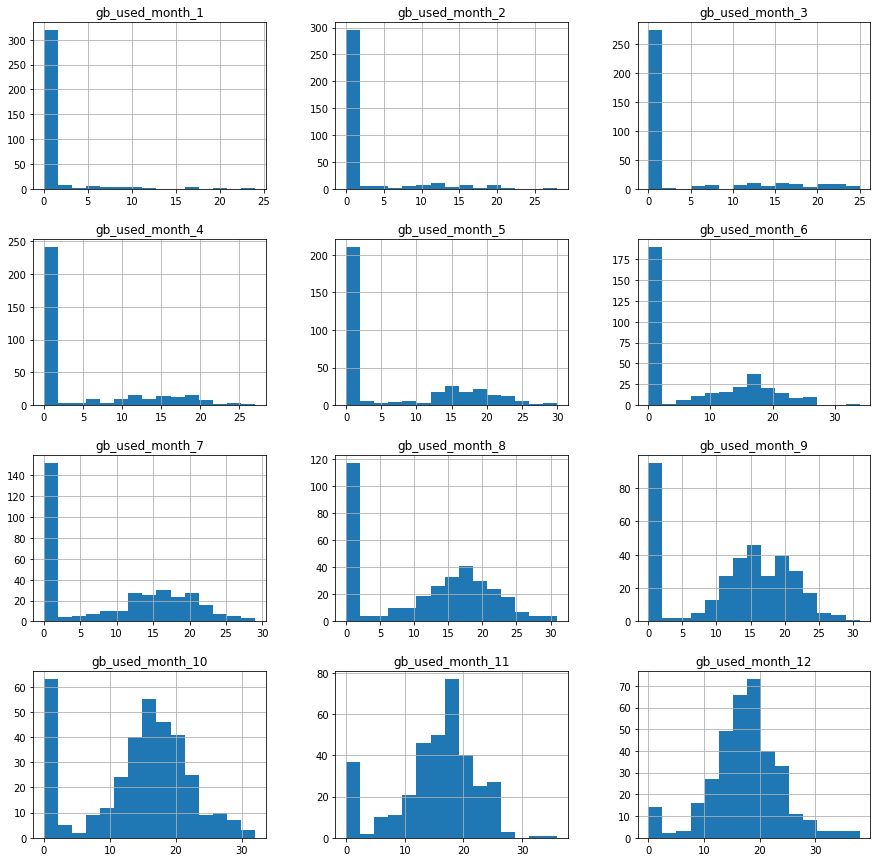

In [212]:
smart_gb.hist(bins=15, figsize=(15,15));

Распределение количества минут в первых трех месяцах сильно отличается от нормального. В остальных близко к нормальному распределению.

In [213]:
print('Среднее:', smart_mess.mean())
print('Дисперсия:', smart_mess.var(ddof=1))
print('Стандартное отклонение:', smart_mess.std(ddof=1))

Среднее: count_messages_month_1     20.000000
count_messages_month_2     27.940000
count_messages_month_3     35.550725
count_messages_month_4     35.864583
count_messages_month_5     39.032787
count_messages_month_6     38.577465
count_messages_month_7     38.988506
count_messages_month_8     38.750000
count_messages_month_9     39.219731
count_messages_month_10    39.082677
count_messages_month_11    39.881481
count_messages_month_12    42.264808
dtype: float64
Дисперсия: count_messages_month_1     252.133333
count_messages_month_2     440.465714
count_messages_month_3     669.780477
count_messages_month_4     517.865680
count_messages_month_5     638.775776
count_messages_month_6     731.635801
count_messages_month_7     719.352468
count_messages_month_8     767.213054
count_messages_month_9     702.505555
count_messages_month_10    736.503019
count_messages_month_11    711.361366
count_messages_month_12    832.447114
dtype: float64
Стандартное отклонение: count_messages_month_1    

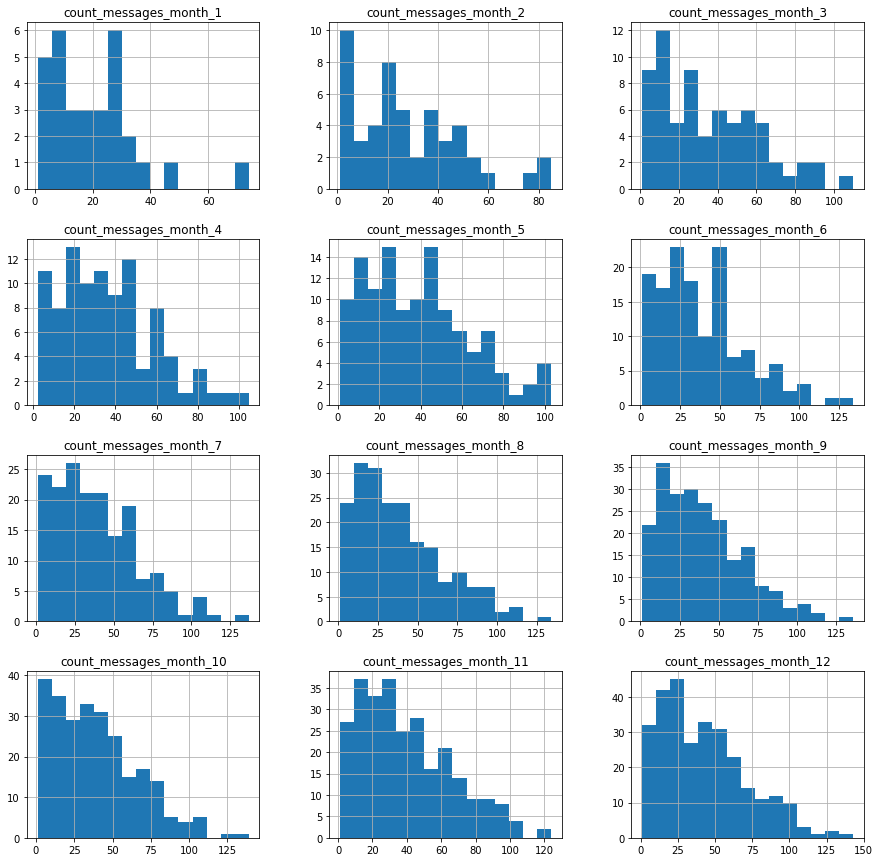

In [214]:
smart_mess.hist(bins=15, figsize=(15,15));

В каждом месяце распределение количества сообщений близко к распределению Пуассона.

Среднее количество минут разговора, объем трафика и количество сообщений от начала 2018 года до его конца увеличивается. Минимальное количество минут, трафика и сообщений было в первых двух месяцах.

### Тариф ultra

In [215]:
print('Среднее:', ultra_calls.mean())
print('Дисперсия:', ultra_calls.var(ddof=1))
print('Стандартное отклонение:', ultra_calls.std(ddof=1))

Среднее: sum_calls_month_1     428.111111
sum_calls_month_2     297.125000
sum_calls_month_3     489.648649
sum_calls_month_4     475.301887
sum_calls_month_5     534.250000
sum_calls_month_6     497.469136
sum_calls_month_7     564.397727
sum_calls_month_8     530.611650
sum_calls_month_9     558.882883
sum_calls_month_10    581.728814
sum_calls_month_11    562.364341
sum_calls_month_12    614.925373
dtype: float64
Дисперсия: sum_calls_month_1      72769.361111
sum_calls_month_2      87919.679348
sum_calls_month_3     111384.900901
sum_calls_month_4      66036.830189
sum_calls_month_5      74881.015873
sum_calls_month_6      86019.652160
sum_calls_month_7      86952.587121
sum_calls_month_8      91169.553588
sum_calls_month_9      98597.904341
sum_calls_month_10     97140.336086
sum_calls_month_11     88449.624031
sum_calls_month_12    107981.031983
dtype: float64
Стандартное отклонение: sum_calls_month_1     269.757968
sum_calls_month_2     296.512528
sum_calls_month_3     333.743765

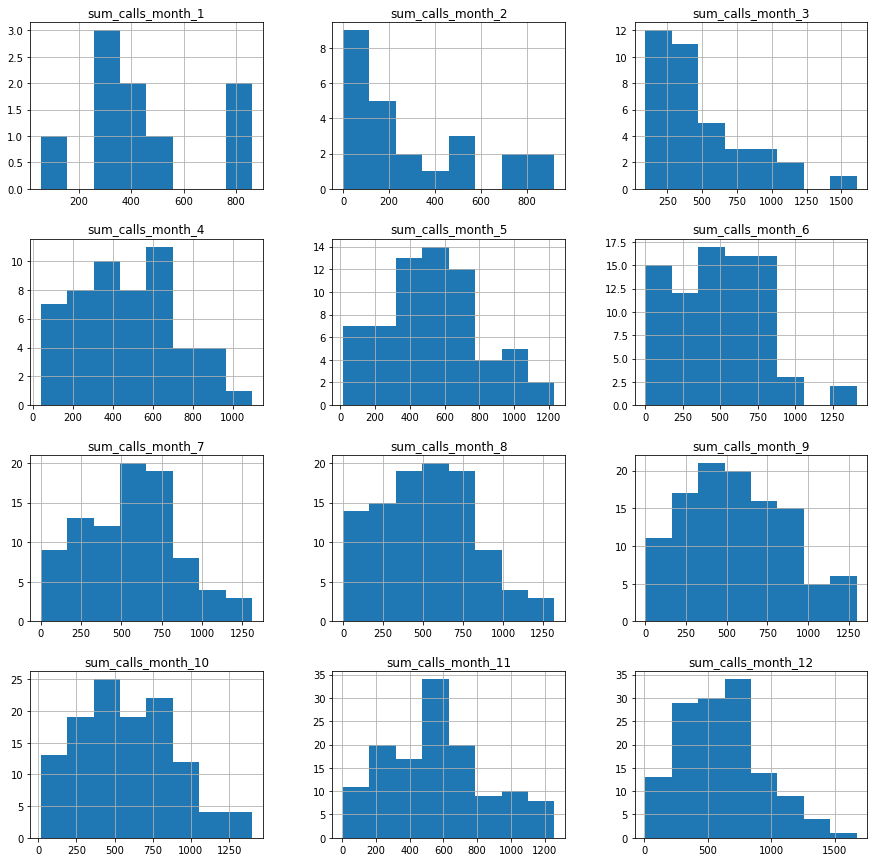

In [216]:
ultra_calls.hist(bins=8, figsize=(15,15));

В первые три месяца распределение количества минут близко к распределению Пуассона. В остальных случаях близко к нормальному.

In [217]:
print('Среднее:', ultra_gb.mean())
print('Дисперсия:', ultra_gb.var(ddof=1))
print('Стандартное отклонение:', ultra_gb.std(ddof=1))

Среднее: gb_used_month_1      0.798658
gb_used_month_2      1.932886
gb_used_month_3      4.382550
gb_used_month_4      6.261745
gb_used_month_5      8.711409
gb_used_month_6     10.677852
gb_used_month_7     12.523490
gb_used_month_8     14.073826
gb_used_month_9     14.852349
gb_used_month_10    16.563758
gb_used_month_11    17.812081
gb_used_month_12    20.281879
dtype: float64
Дисперсия: gb_used_month_1      12.391620
gb_used_month_2      36.549519
gb_used_month_3      86.345910
gb_used_month_4     100.099946
gb_used_month_5     136.152639
gb_used_month_6     135.030655
gb_used_month_7     159.278161
gb_used_month_8     153.582351
gb_used_month_9     132.099673
gb_used_month_10    133.612461
gb_used_month_11    120.045529
gb_used_month_12    126.055142
dtype: float64
Стандартное отклонение: gb_used_month_1      3.520173
gb_used_month_2      6.045620
gb_used_month_3      9.292250
gb_used_month_4     10.004996
gb_used_month_5     11.668446
gb_used_month_6     11.620269
gb_used_month_

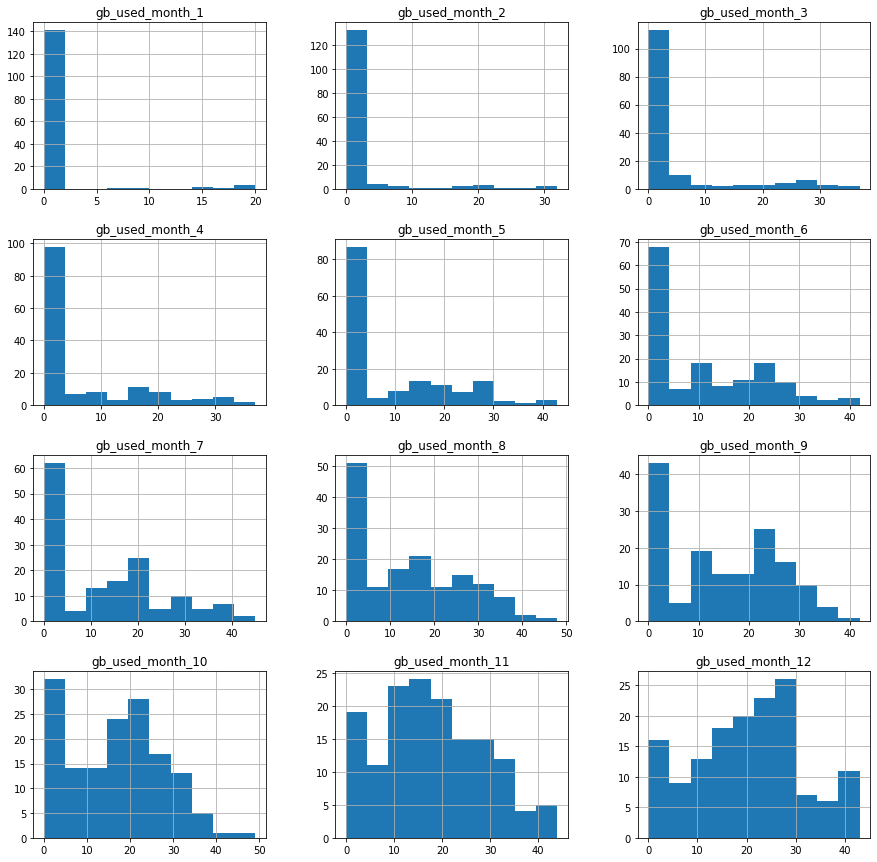

In [218]:
ultra_gb.hist(bins=10, figsize=(15,15));

В первые три месяца распределение количества GB близко к распределению Пуассона. В остальных случаях близко к нормальному.

In [219]:
print('Среднее:', ultra_mess.mean())
print('Дисперсия:', ultra_mess.var(ddof=1))
print('Стандартное отклонение:', ultra_mess.std(ddof=1))

Среднее: count_messages_month_1     43.428571
count_messages_month_2     32.937500
count_messages_month_3     47.800000
count_messages_month_4     44.512821
count_messages_month_5     48.769231
count_messages_month_6     52.313433
count_messages_month_7     62.136986
count_messages_month_8     58.897727
count_messages_month_9     63.294737
count_messages_month_10    69.776699
count_messages_month_11    66.159292
count_messages_month_12    72.008547
dtype: float64
Дисперсия: count_messages_month_1      765.285714
count_messages_month_2      713.395833
count_messages_month_3     1826.666667
count_messages_month_4     1408.256410
count_messages_month_5     1559.553544
count_messages_month_6     1935.672999
count_messages_month_7     2190.730974
count_messages_month_8     2022.966432
count_messages_month_9     1906.763270
count_messages_month_10    2426.606511
count_messages_month_11    2249.295828
count_messages_month_12    2362.870616
dtype: float64
Стандартное отклонение: count_messages

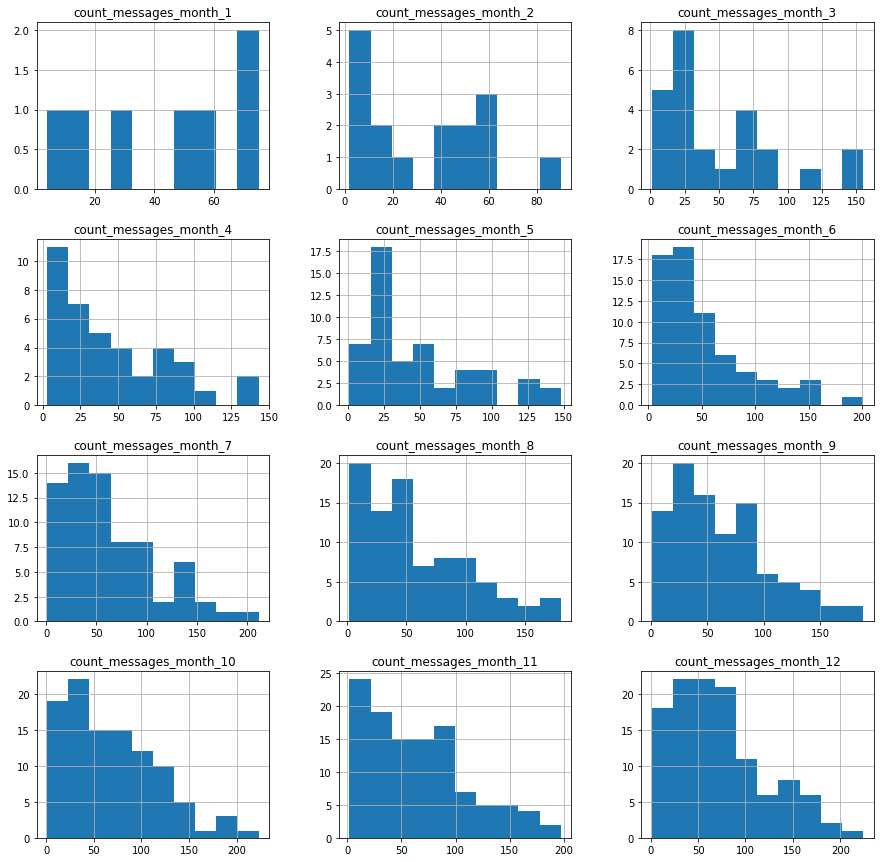

In [220]:
ultra_mess.hist(bins=10, figsize=(15,15));

В каждом месяце распределение количества сообщений близко к распределению Пуассона.

Среднее количество минут разговора, объем трафика и количество сообщений от начала 2018 года до его конца увеличивается. Минимальное количество минут, трафика и сообщений было в первых двух месяцах.

## Проверка гипотез

### Гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

In [221]:
smart_revenue = users.query("tariff == 'smart'").iloc[:,58:].values
ultra_revenue = users.query("tariff == 'ultra'").iloc[:,58:].values

In [222]:
res_smart = smart_revenue.flatten()
res_ultra = ultra_revenue.flatten()

In [223]:
res_smart.mean(), res_ultra.mean()

(682.7875118708452, 1141.5268456375838)

H0: средняя выручка пользователей тарифов "Ультра" и "Смарт" не различаются. <br>
H1: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

In [224]:
alpha = 0.05

results = st.ttest_ind(
    res_smart, 
    res_ultra, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 2.003739070365922e-55
Отвергаем нулевую гипотезу


Так как значение p намного меньше 0.05, следовательно, мы отвергаем нулевую гипотезу, что средняя выручка пользователей тарифов "Смарт" и "Ультра" отличаются.

Я проверял гипотезу о равенстве средних в двух выборках. Использовал t-тест. Так как размеры выборок сильно отличаются, то я использовал параметр equal_var = False

### Гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [225]:
moscow_revenue = users.query("city == 'Москва'").iloc[:,58:].values
other_revenue = users.query("city != 'Москва'").iloc[:,58:].values

In [226]:
res_moscow = moscow_revenue.flatten()
res_other = other_revenue.flatten()

In [227]:
print(res_moscow.mean(), res_other.mean())

795.489898989899 825.417497921862


H0: средняя выручка пользователей из Москвы и других городов не различаются. <br>
H1: средняя выручка пользователей из Москвы и других городов других городов различаются.

In [228]:
alpha = 0.05

results = st.ttest_ind(
    res_moscow, 
    res_other)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.3363033067088109
Не получилось отвергнуть нулевую гипотезу


Так как значение p больше 0.05, то не получилось отвергнуть нулевую гипотезу, что нет различий между средней выручкой среди пользователей из Москвы и других городов. Но если мы пример alpha 0.01, то все равно не получилось отвергнуть нулевую гипотезу.

## Общий вывод:

Таким образом, был проведен статистический анализ данных по использованию двух тарифов компании "Мегалайн": ультра и смарт. 
1. Среднее значение выручки пользователей по тарифам "Ультра" и "Смарт" отличаются. Среднее значение выручки в месяц с пользователя по тарифу "Ультра" составило 1142 рубля, а по тарифу "Смарт" 682 рублей.
2. Среднее значение выручки пользователей в Москве и других городах не различаются.
3. В течение 2018 года в обоих тарифах наблюдался рост числа минут разговора, количества сообщений и интернет-трафика.
4. За 2018 год 38 человек отказались от своего тарифа.
5. Число пользователей, которые используют тариф "Смарт" составило 351 человек, а "Ультра" 149 человек.
6. Наибольшую прибыль приносит тариф "Ультра" 1142 рубля в месяц с пользователя.